In [62]:
#!/usr/bin/python
import sys
import pandas as pd
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import warnings
import csv
import numpy as np


In [63]:
#Read data

df = pd.read_csv (r'Data/suicidedataextrafeatures.csv',encoding= 'unicode_escape')
df.style.hide_index()
print(df.head(5))

     country  year     sex          age  suicides_no  population  \
0  Argentina  1985    male    75+ years          202      363000   
1  Argentina  1985    male  55-74 years          485     1997000   
2  Argentina  1985    male  35-54 years          414     3346300   
3  Argentina  1985  female  55-74 years          210     2304000   
4  Argentina  1985    male  25-34 years          177     2234200   

   suicidesper100k   country-year  yearlyHDI      GDPpyear  ...  \
0            55.65  Argentina1985      0.694  8.841667e+10  ...   
1            24.29  Argentina1985      0.694  8.841667e+10  ...   
2            12.37  Argentina1985      0.694  8.841667e+10  ...   
3             9.11  Argentina1985      0.694  8.841667e+10  ...   
4             7.92  Argentina1985      0.694  8.841667e+10  ...   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                                0.0                     
1                                       

In [64]:
#Identify the columns 
for col in df.columns: 
    print(col)

country
year
sex
age
suicides_no
population
suicidesper100k
country-year
yearlyHDI
GDPpyear
GDPpcapital
generation
suicide%
Individuals using the Internet (% of population)
Expense (% of GDP)
Compensation of employees (% of expense)
Unemployment, total (% of total labor force) (modeled ILO estimate)
Physicians (per 1,000 people)
Strength of legal rights index (0=weak to 12=strong)
Labor force, total
Life expectancy at birth, total (years)
Mobile cellular subscriptions (per 100 people)
Refugee population by country or territory of origin
Contributing family workers, total (% of total employment) (modeled ILO estimate)
Access to electricity (% of population)
Lower secondary completion rate, total (% of relevant age group)


In [65]:
#Prepare data:
#Select relevant columns

# select columns
df= df[['country', 'year', 'sex', 'age', 'suicidesper100k','generation', 'Life expectancy at birth, total (years)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']]

In [66]:
print(df.sample(10))

              country  year     sex          age  suicidesper100k  \
2162           Brazil  2000  female  55-74 years             2.51   
908         Australia  2004    male   5-14 years             0.50   
15022      Uzbekistan  2004  female  35-54 years             2.54   
6744          Hungary  2003  female  25-34 years             4.27   
14280  United Kingdom  1999    male   5-14 years             0.10   
5709          Georgia  1996  female  55-74 years             3.03   
8501          Jamaica  2002  female  55-74 years             0.00   
4031          Croatia  2014  female    75+ years            17.44   
1336          Austria  2010  female  55-74 years             9.75   
5302           France  1986  female  35-54 years            16.99   

         generation  Life expectancy at birth, total (years)  \
2162         Silent                                70.116000   
908      Millenials                                80.490244   
15022       Boomers                             

In [67]:
#Renombrar columnas
df.rename(columns={'Life expectancy at birth, total (years)':'LifeExpectancy',
                          'Unemployment, total (% of total labor force) (modeled ILO estimate)':'UnemploymentRate'
                  }, 
                 inplace=True)


C:\Users\victo\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
print(df.head(30))
#print(df.sample(20))

      country  year     sex          age  suicidesper100k       generation  \
0   Argentina  1985    male    75+ years            55.65  G.I. Generation   
1   Argentina  1985    male  55-74 years            24.29  G.I. Generation   
2   Argentina  1985    male  35-54 years            12.37           Silent   
3   Argentina  1985  female  55-74 years             9.11  G.I. Generation   
4   Argentina  1985    male  25-34 years             7.92          Boomers   
5   Argentina  1985  female    75+ years             7.64  G.I. Generation   
6   Argentina  1985    male  15-24 years             6.46     Generation X   
7   Argentina  1985  female  35-54 years             4.23           Silent   
8   Argentina  1985  female  25-34 years             2.97          Boomers   
9   Argentina  1985  female  15-24 years             2.93     Generation X   
10  Argentina  1985    male   5-14 years             0.53     Generation X   
11  Argentina  1985  female   5-14 years             0.37     Ge

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


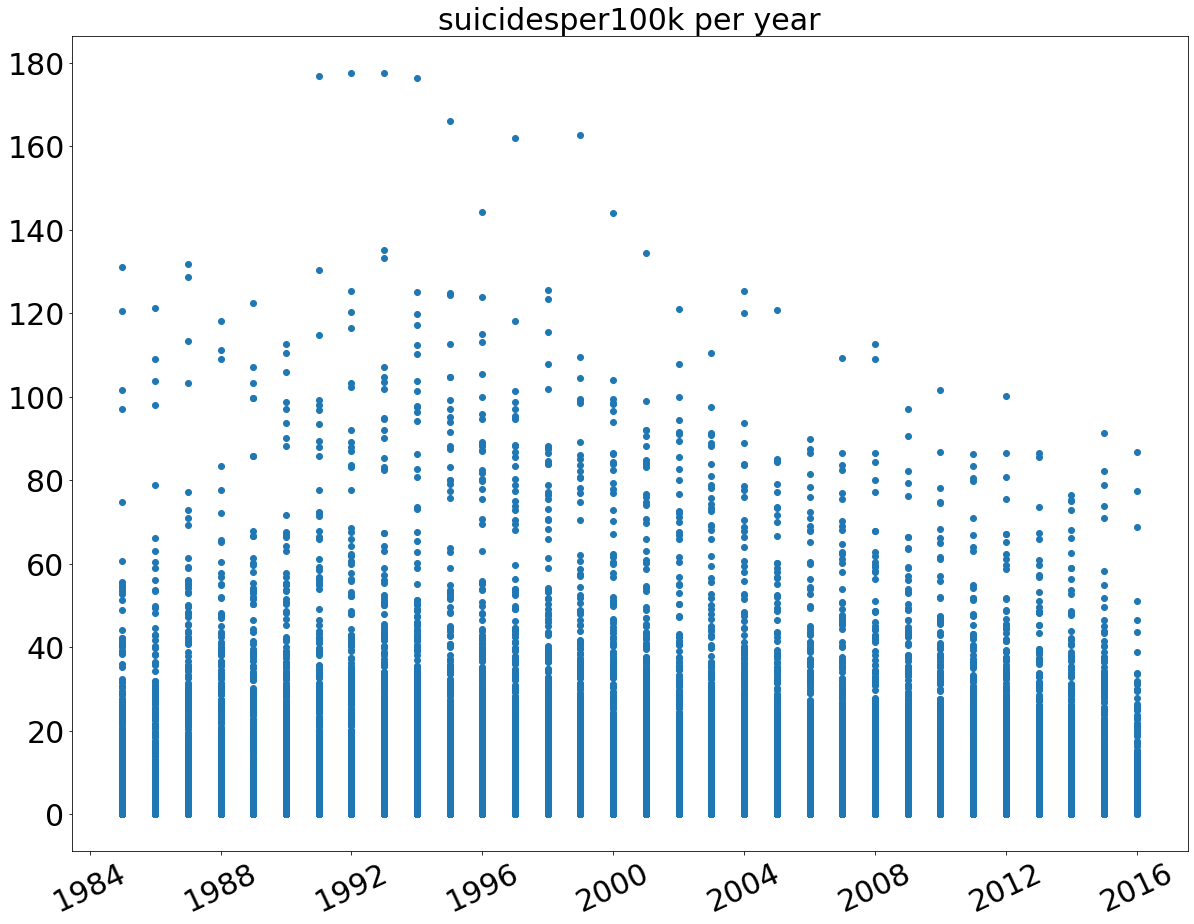

In [69]:
#Gráfico de dispersión
plt.figure(figsize=(20,15))
plt.title('suicidesper100k per year', fontsize=30)
plt.scatter(df['year'],df['suicidesper100k'])
ax=plt.axes()
plt.xticks(fontsize= 30, rotation=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.yticks(fontsize= 30)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

In [70]:
#df_mexico=df[df['country']=='Mexico']
#print(df_mexico.head(3))

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


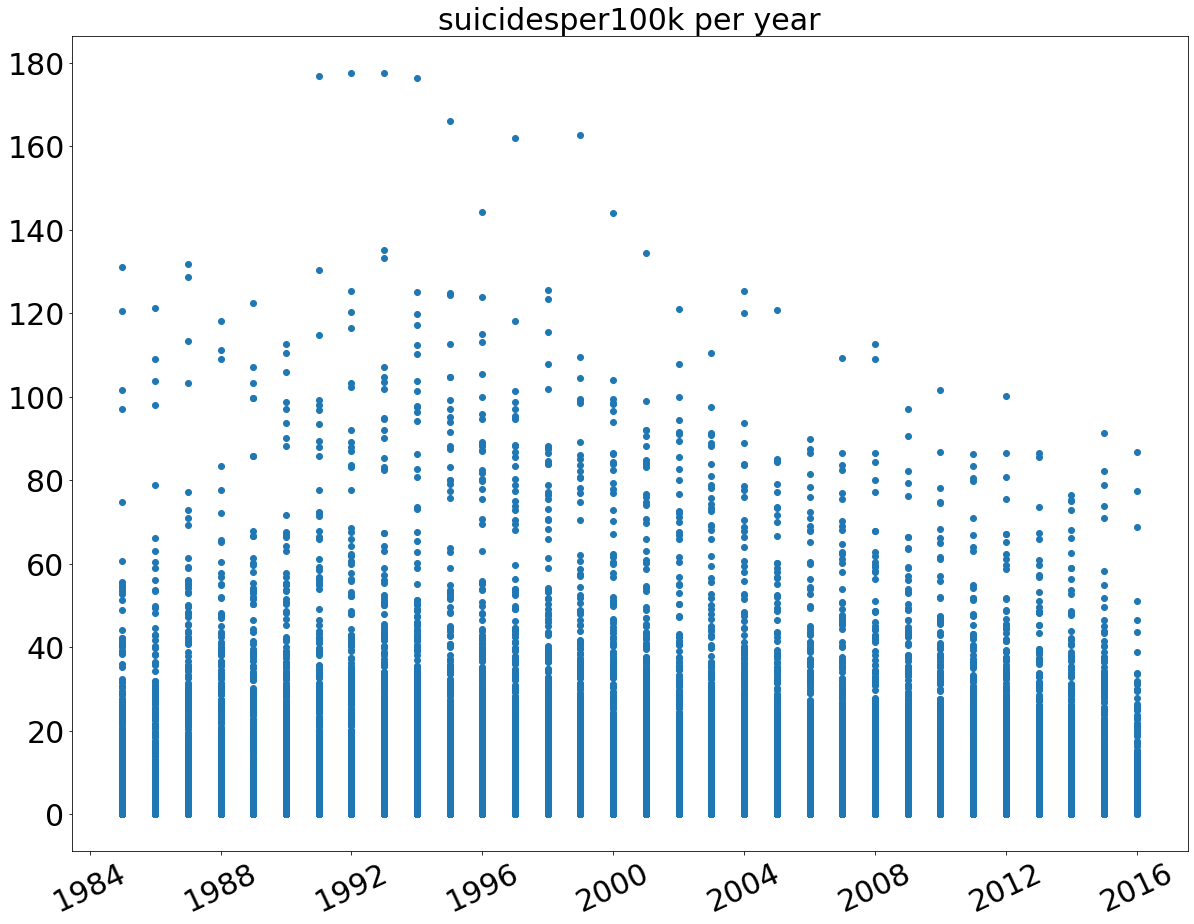

In [71]:
#Gráfico de dispersión
plt.figure(figsize=(20,15))
plt.title('suicidesper100k per year', fontsize=30)
plt.scatter(df['year'],df['suicidesper100k'])
ax=plt.axes()
plt.xticks(fontsize= 30, rotation=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.yticks(fontsize= 30)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

In [73]:
df_15to24_years =df[df['age'] == '15-24 years']
print(df_15to24_years['suicidesper100k'])

6         6.46
9         2.93
18        7.66
21        4.27
30        7.27
         ...  
15078     9.72
15088    10.63
15089    10.09
15100    11.59
15102    11.10
Name: suicidesper100k, Length: 2522, dtype: float64


In [75]:
df_15to24_years_females = df_15to24_years[df_15to24_years['sex'] == 'female']
print(df_15to24_years_females['suicidesper100k'])

9         2.93
21        4.27
33        3.88
44        4.11
57        3.19
         ...  
15054     6.71
15065     8.02
15077    10.84
15088    10.63
15100    11.59
Name: suicidesper100k, Length: 1261, dtype: float64


In [76]:
df_15to24_years_males_copy = df_15to24_years[df_15to24_years['sex'] == 'female']
print(df_15to24_years_females['suicidesper100k'])

9         2.93
21        4.27
33        3.88
44        4.11
57        3.19
         ...  
15054     6.71
15065     8.02
15077    10.84
15088    10.63
15100    11.59
Name: suicidesper100k, Length: 1261, dtype: float64


C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


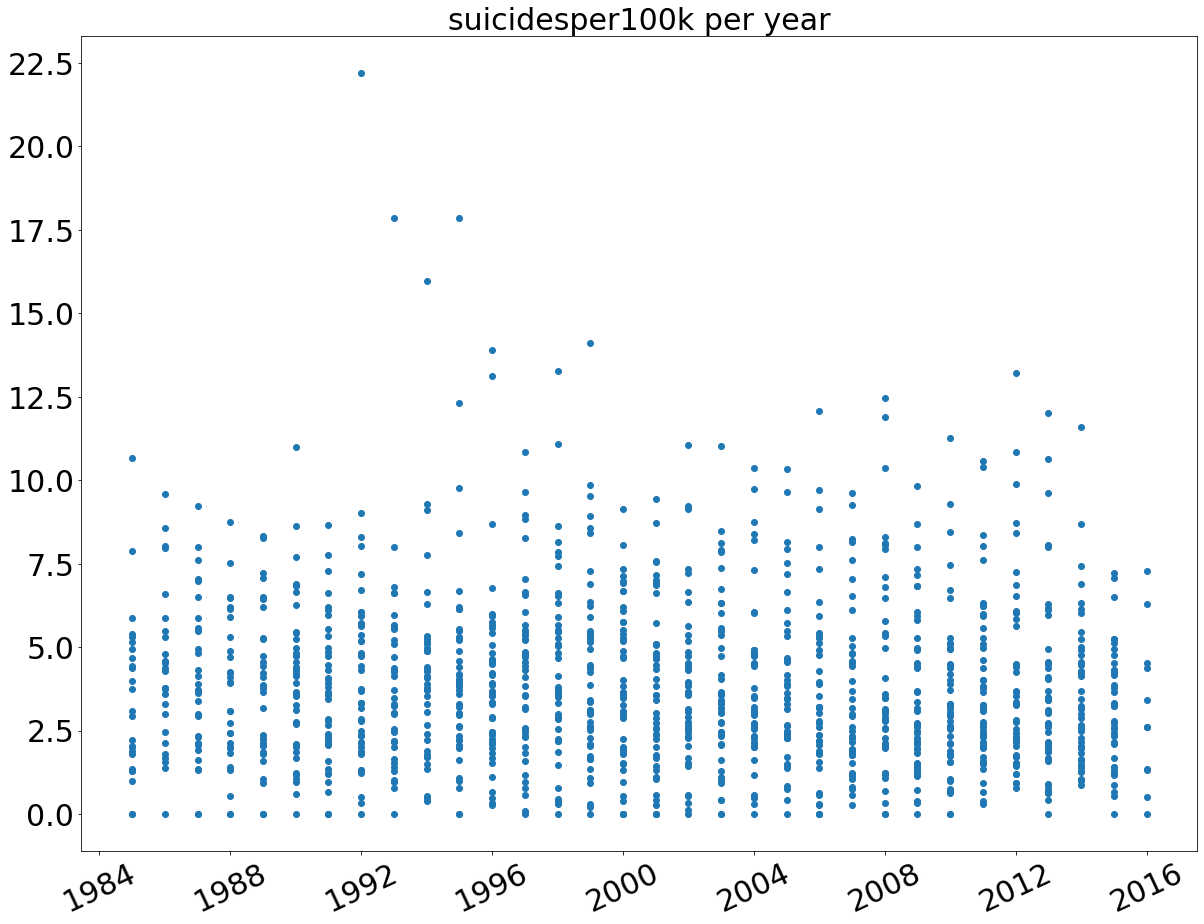

In [77]:
#Gráfico de dispersión
plt.figure(figsize=(20,15))
plt.title('suicidesper100k per year', fontsize=30)
plt.scatter(df_15to24_years_females['year'],df_15to24_years_females['suicidesper100k'])
ax=plt.axes()
plt.xticks(fontsize= 30, rotation=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.yticks(fontsize= 30)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
#plt.show()
plt.savefig("SuicidesGlobalFemales.png")

In [78]:
plt.savefig("myplot.pdf")

<Figure size 432x288 with 0 Axes>

In [80]:
print(df_15to24_years_females)

          country  year     sex          age  suicidesper100k    generation  \
9       Argentina  1985  female  15-24 years             2.93  Generation X   
21      Argentina  1986  female  15-24 years             4.27  Generation X   
33      Argentina  1987  female  15-24 years             3.88  Generation X   
44      Argentina  1988  female  15-24 years             4.11  Generation X   
57      Argentina  1989  female  15-24 years             3.19  Generation X   
...           ...   ...     ...          ...              ...           ...   
15054  Uzbekistan  2010  female  15-24 years             6.71    Millenials   
15065  Uzbekistan  2011  female  15-24 years             8.02    Millenials   
15077  Uzbekistan  2012  female  15-24 years            10.84    Millenials   
15088  Uzbekistan  2013  female  15-24 years            10.63    Millenials   
15100  Uzbekistan  2014  female  15-24 years            11.59    Millenials   

       LifeExpectancy  UnemploymentRate  
9        

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


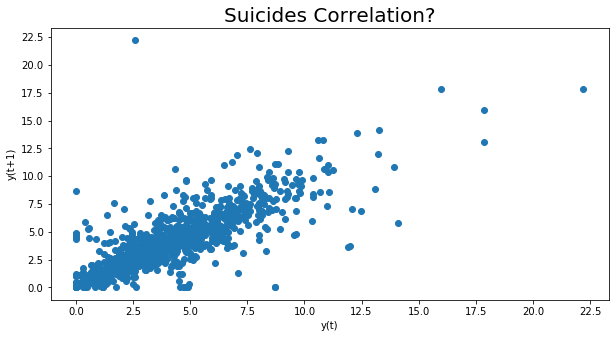

In [109]:
plt.figure(figsize=(10,5))
plt.title('Suicides Correlation?', fontsize=20)
lag_plot(df_15to24_years_females['suicidesper100k'])
ax=plt.axes()
plt.xticks(fontsize= 10)
plt.xlabel('y(t)',fontsize= 10)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.yticks(fontsize= 10)
plt.ylabel('y(t+1)', fontsize= 10)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.savefig("SuicidesCorrelation.png")
#plt.show()
#lag=el ciclo periódico

In [83]:
#Habría una correlación?
series=pd.Series(df_15to24_years_females['suicidesper100k'].copy())

In [84]:
#We also check how correlated are the variables
values = DataFrame(series.values)
df_15to24_years_females_corr = concat([values.shift(1), values], axis=1)
df_15to24_years_females_corr.columns = ['t-1', 't+1']
result = df_15to24_years_females_corr.corr()
print("Checking correlation coefficients")
print(result)

Checking correlation coefficients
          t-1       t+1
t-1  1.000000  0.815692
t+1  0.815692  1.000000


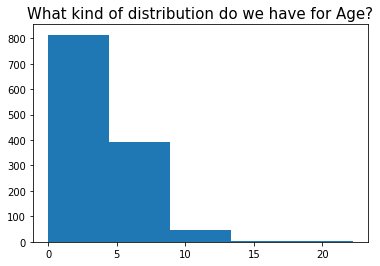

In [85]:
# We not found a simetric distribution
#We want to do Bayesian Analysis with this sample
#We take the Age column as the observed measurement for our sample = Age
#What do we take as a prior probability density function?
#PRIOR= 
#We need to determine a POSTERIOR DISTRIBUTION
#Check form of the distribution
#______________________________________________________________
#Checking distribution of prices
#______________________________________________________________
plt.title('What kind of distribution do we have for Age?', fontsize=15)
plt.hist(series, bins=5)
#plt.show()
plt.savefig("SuicidesGlobalDistribution.png")

In [86]:
print(df_15to24_years_females)

          country  year     sex          age  suicidesper100k    generation  \
9       Argentina  1985  female  15-24 years             2.93  Generation X   
21      Argentina  1986  female  15-24 years             4.27  Generation X   
33      Argentina  1987  female  15-24 years             3.88  Generation X   
44      Argentina  1988  female  15-24 years             4.11  Generation X   
57      Argentina  1989  female  15-24 years             3.19  Generation X   
...           ...   ...     ...          ...              ...           ...   
15054  Uzbekistan  2010  female  15-24 years             6.71    Millenials   
15065  Uzbekistan  2011  female  15-24 years             8.02    Millenials   
15077  Uzbekistan  2012  female  15-24 years            10.84    Millenials   
15088  Uzbekistan  2013  female  15-24 years            10.63    Millenials   
15100  Uzbekistan  2014  female  15-24 years            11.59    Millenials   

       LifeExpectancy  UnemploymentRate  
9        

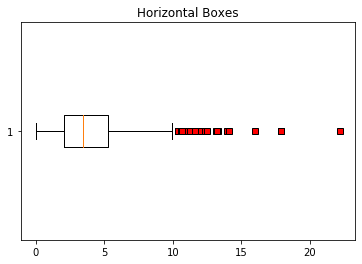

In [89]:
#The distribution of age is a uniform distribution around 1.0 with some outliers
# identify outliers with boxes
red_square = dict(markerfacecolor='r', marker='s')
fig2, ax2 = plt.subplots()
ax2.set_title('Horizontal Boxes')
ax2.boxplot(df_15to24_years_females['suicidesper100k'], vert=False, flierprops=red_square)
# ax2.boxplot(df_mexico_15to24_years_males.corr['suicidesper100k'])
# plt.show()
#print(df_mexico_15to24_years_males_copy['suicidesper100k'])
plt.savefig("SuicidesGlobalOutliers.png")

In [92]:
#Box plot: Shows the QUARTILES: Division by 4 of the whole distribution
#Interquartile Range= longitud entre el primer quartil Q1 y el tercer quartil Q3  IQR=Q3-Q1=lado horizontal de la caja
#Linea naranja es la MEDIA: divide la distribución exactamente a la mitad
data_mean=np.mean(df_15to24_years_females['suicidesper100k'])
data_median=np.median(df_15to24_years_females['suicidesper100k'])
data_sd=np.std(df_15to24_years_females['suicidesper100k'])
print(data_mean)
print(data_median)
print(data_sd)


3.872696272799367
3.46
2.6198593760761923


In [94]:
#Based on Mean
cut_off = data_sd*2.649
lower, upper = data_mean- cut_off,data_mean+cut_off
y=df_15to24_years_females['suicidesper100k'].copy()
outliers_removed = [x for x in y if x < lower or x > upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 22


In [96]:
#Based on median
cut_off = data_sd*2.649
lower, upper = data_median- cut_off,data_median+cut_off
y=df_15to24_years_females['suicidesper100k'].copy()
outliers_removed = [x for x in y if x < lower or x > upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 25


In [97]:
#
from scipy import stats


In [99]:
IQR= stats.iqr(df_15to24_years_females['suicidesper100k'])


In [100]:
Q1=np.percentile(y,0.25)
print(Q1)

0.0


In [101]:
Q3=np.percentile(y,0.75)
print(Q3)

0.0


In [102]:
lower = Q1 - 1.5*IQR
print(lower)

-4.800000000000001


In [103]:
upper = Q3 + 1.5*IQR
print(upper)

4.800000000000001


In [104]:
print(IQR)

3.2


In [106]:
y=df_15to24_years_females['suicidesper100k'].copy()
outliers_removed = [x for x in y if x < lower or x > upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 386


In [107]:
print(np.mean(outliers_removed))

6.961580310880829


In [34]:
#HERE I PUT correctly how to remove the outliers taking into account the IR: all outside the whiskers in the box plot will 
#be removed, and now we can see that the average X is 100.0